In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
!gunzip -c ./clean-loan-data.csv.gz > ./clean-loan-data.csv

In [2]:
start_df = pd.read_csv('./clean-loan-data.csv', low_memory=False)

In [3]:
df = start_df.copy(deep=True)
df.head()

id_pk  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599     5000.0       5000.0           4975.0    36   
1  1077430    1314167     2500.0       2500.0           2500.0    60   
2  1077175    1313524     2400.0       2400.0           2400.0    36   
3  1076863    1277178    10000.0      10000.0          10000.0    36   
4  1075358    1311748     3000.0       3000.0           3000.0    60   

   int_rate  installment grade sub_grade  ... next_pymnt_year  \
0     10.65       162.87     B        B2  ...             NaN   
1     15.27        59.83     C        C4  ...             NaN   
2     15.96        84.33     C        C5  ...             NaN   
3     13.49       339.31     C        C1  ...             NaN   
4     12.69        67.79     B        B5  ...          2016.0   

   last_credit_pull_month last_credit_pull_year  collections_12_mths_ex_med  \
0                     Jan                2016.0                         0.0   
1                     Sep                2013.0                         0.0   
2                     Jan                2016.0                         0.0   
3                     Jan                2015.0                         0.0   
4                     Jan                2016.0                         0.0   

  policy_code application_type  acc_now_delinq tot_coll_amt tot_cur_bal  \
0         1.0       INDIVIDUAL             0.0          NaN         NaN   
1         1.0       INDIVIDUAL             0.0          NaN         NaN   
2         1.0       INDIVIDUAL             0.0          NaN         NaN   
3         1.0       INDIVIDUAL             0.0          NaN         NaN   
4         1.0       INDIVIDUAL             0.0          NaN         NaN   

  total_rev_hi_lim  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  

[5 rows x 59 columns]

In [23]:
df[0:4].T

0  \
id_pk                                                                 1077501   
member_id                                                             1296599   
loan_amnt                                                              5000.0   
funded_amnt                                                            5000.0   
funded_amnt_inv                                                        4975.0   
term                                                                       36   
int_rate                                                                10.65   
installment                                                            162.87   
grade                                                                       B   
sub_grade                                                                  B2   
emp_title                                                                 NaN   
emp_length                                                                 10   
home_ownership                                                           RENT   
annual_inc                                                            24000.0   
verification_status                                                  Verified   
issue_month                                                               Dec   
issue_year                                                               2011   
loan_status                                                        Fully Paid   
pymnt_plan                                                                  n   
url                         https://www.lendingclub.com/browse/loanDetail....   
purpose                                                           credit_card   
title                                                                Computer   
zip_code                                                                860xx   
addr_state                                                                 AZ   
dti                                                                     27.65   
delinq_2yrs                                                               0.0   
earliest_cr_line_month                                                    Jan   
earliest_cr_line_year                                                  1985.0   
inq_last_6mths                                                            1.0   
mths_since_last_delinq                                                    NaN   
open_acc                                                                  3.0   
pub_rec                                                                   0.0   
revol_bal                                                             13648.0   
revol_util                                                               83.7   
total_acc                                                                 9.0   
initial_list_status                                                         f   
out_prncp                                                                 0.0   
out_prncp_inv                                                             0.0   
total_pymnt                                                       5861.071414   
total_pymnt_inv                                                       5831.78   
total_rec_prncp                                                        5000.0   
total_rec_int                                                          861.07   
total_rec_late_fee                                                        0.0   
recoveries                                                                0.0   
collection_recovery_fee                                                   0.0   
last_pymnt_month                                                          Jan   
last_pymnt_year                                                        2015.0   
last_pymnt_amnt                                                        171.62   
next_pymnt_month                                                          NaN   
next_pymnt_year           

In [6]:
df.describe()

id_pk     member_id      loan_amnt    funded_amnt  \
count  8.873790e+05  8.873790e+05  887379.000000  887379.000000   
mean   3.246513e+07  3.500182e+07   14755.264605   14741.877625   
std    2.282734e+07  2.411335e+07    8435.455601    8429.897657   
min    5.473400e+04  7.047300e+04     500.000000     500.000000   
25%    9.206643e+06  1.087713e+07    8000.000000    8000.000000   
50%    3.443327e+07  3.709528e+07   13000.000000   13000.000000   
75%    5.490814e+07  5.847135e+07   20000.000000   20000.000000   
max    6.861706e+07  7.354484e+07   35000.000000   35000.000000   

       funded_amnt_inv           term       int_rate    installment  \
count    887379.000000  887379.000000  887379.000000  887379.000000   
mean      14702.464383      43.201090      13.246740     436.717127   
std        8442.106732      10.998663       4.381867     244.186593   
min           0.000000      36.000000       5.320000      15.670000   
25%        8000.000000      36.000000       9.990000     260.705000   
50%       13000.000000      36.000000      12.990000     382.550000   
75%       20000.000000      60.000000      16.200000     572.600000   
max       35000.000000      60.000000      28.990000    1445.460000   

          emp_length    annual_inc  ...  last_pymnt_year  last_pymnt_amnt  \
count  887379.000000  8.873750e+05  ...    869720.000000    887379.000000   
mean        5.705172  7.502759e+04  ...      2015.311879      2164.145585   
std         3.807020  6.469830e+04  ...         0.998102      4794.783233   
min         0.000000  0.000000e+00  ...      2007.000000         0.000000   
25%         2.000000  4.500000e+04  ...      2015.000000       280.170000   
50%         6.000000  6.500000e+04  ...      2016.000000       462.780000   
75%        10.000000  9.000000e+04  ...      2016.000000       831.245000   
max        10.000000  9.500000e+06  ...      2016.000000     36475.590000   

       next_pymnt_year  last_credit_pull_year  collections_12_mths_ex_med  \
count    634408.000000          887326.000000               887234.000000   
mean       2015.978828            2015.719622                    0.014380   
std           0.337062               0.745282                    0.134191   
min        2007.000000            2007.000000                    0.000000   
25%        2016.000000            2016.000000                    0.000000   
50%        2016.000000            2016.000000                    0.000000   
75%        2016.000000            2016.000000                    0.000000   
max        2016.000000            2016.000000                   20.000000   

       policy_code  acc_now_delinq  tot_coll_amt   tot_cur_bal  \
count     887379.0   887350.000000  8.171030e+05  8.171030e+05   
mean           1.0        0.004991  2.257026e+02  1.394582e+05   
std            0.0        0.077625  1.031137e+04  1.537500e+05   
min            1.0        0.000000  0.000000e+00  0.000000e+00   
25%            1.0        0.000000  0.000000e+00  2.985300e+04   
50%            1.0        0.000000  0.000000e+00  8.055900e+04   
75%            1.0        0.000000  0.000000e+00  2.082050e+05   
max            1.0       14.000000  9.152545e+06  8.000078e+06   

       total_rev_hi_lim  
count      8.171030e+05  
mean       3.206862e+04  
std        3.749826e+04  
min        0.000000e+00  
25%        1.390000e+04  
50%        2.370000e+04  
75%        3.980000e+04  
max        9.999999e+06  

[8 rows x 40 columns]

In [8]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns


## Missing Data


In [27]:
miss_values = null_values(df)
miss_values[0:]

Dataframe has 60 columns.
There are 23 columns that have missing values.


Missing Values  % of Total Values
mths_since_last_delinq              454312               51.2
next_pymnt_year                     252971               28.5
next_pymnt_month                    252971               28.5
total_rev_hi_lim                     70276                7.9
tot_cur_bal                          70276                7.9
tot_coll_amt                         70276                7.9
emp_title                            51462                5.8
last_pymnt_month                     17659                2.0
last_pymnt_year                      17659                2.0
revol_util                             502                0.1
title                                  152                0.0
collections_12_mths_ex_med             145                0.0
last_credit_pull_month                  53                0.0
last_credit_pull_year                   53                0.0
inq_last_6mths                          29                0.0
open_acc                                29                0.0
pub_rec                                 29                0.0
earliest_cr_line_year                   29                0.0
earliest_cr_line_month                  29                0.0
acc_now_delinq                          29                0.0
delinq_2yrs                             29                0.0
total_acc                               29                0.0
annual_inc                               4                0.0

In [30]:
df.nunique()

id_pk                         887379
member_id                     887379
loan_amnt                       1372
funded_amnt                     1372
funded_amnt_inv                 9856
term                               2
int_rate                         542
installment                    68711
grade                              7
sub_grade                         35
emp_title                     299271
emp_length                        11
home_ownership                     6
annual_inc                     49384
verification_status                3
issue_month                       12
issue_year                         9
loan_status                       10
pymnt_plan                         2
url                           887379
purpose                           14
title                          63144
zip_code                         935
addr_state                        51
dti                             4086
delinq_2yrs                       29
earliest_cr_line_month            12
e

## Exporative Analysis

## Is Balanced?

0 = No Default<br />
1 = Default


In [10]:
target_list = [1 if i=='Default' else 0 for i in df['loan_status']]

df['TARGET'] = target_list
df['TARGET'].value_counts()

0    886160
1      1219
Name: TARGET, dtype: int64

## Data Types

Text(0, 0.5, 'Data type')

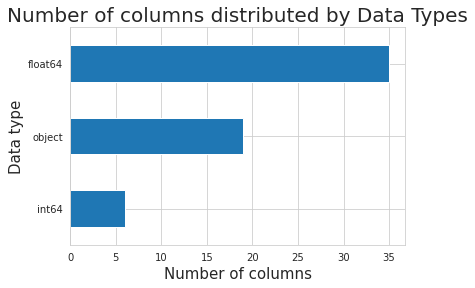

In [11]:
# Number of each type of column
df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)


In [12]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

grade                          7
sub_grade                     35
emp_title                 299271
home_ownership                 6
verification_status            3
issue_month                   12
loan_status                   10
pymnt_plan                     2
url                       887379
purpose                       14
title                      63144
zip_code                     935
addr_state                    51
earliest_cr_line_month        12
initial_list_status            2
last_pymnt_month              12
next_pymnt_month              12
last_credit_pull_month        12
application_type               2
dtype: int64

## Number of loans distributed by Employment Years


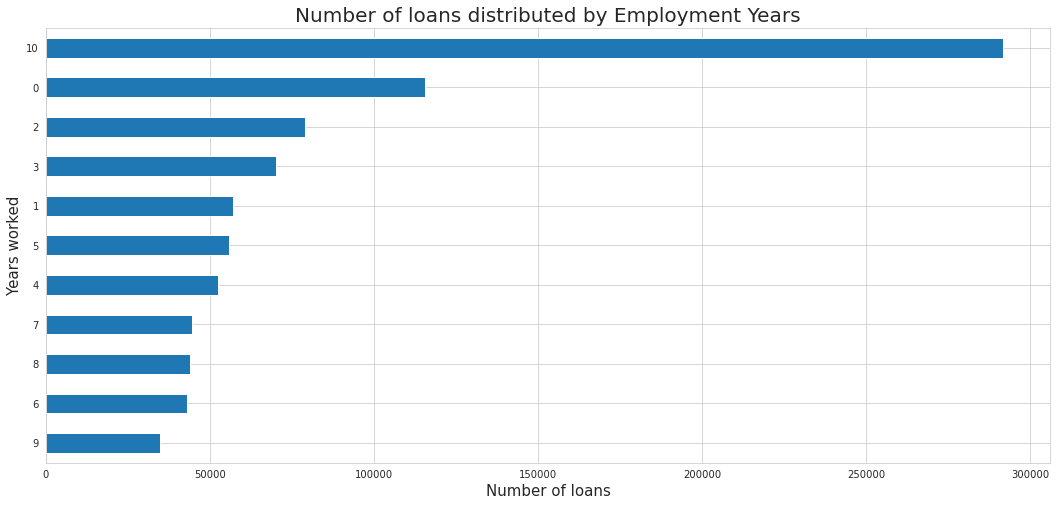

In [13]:
df['emp_length'].fillna(value=0,inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);


### Payment Plans

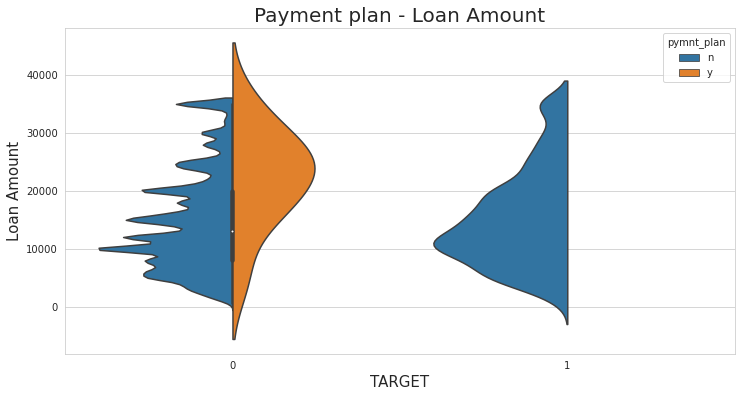

In [17]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="pymnt_plan", split=True)
plt.title("Payment plan - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);




In [33]:
# Remove Data with more than 70% missing data

temp = [i for i in df.count()<len(df) *0.30]
print (temp)
df.drop(df.columns[temp],axis=1,inplace=True)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [35]:
corr = df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(10)*100)
print('\nMost Negative Correlations:\n', corr.head(10)*100)

Most Positive Correlations:
 inq_last_6mths             0.604152
term                       0.917829
total_rec_int              1.048990
last_credit_pull_year      1.154477
total_rec_late_fee         1.175822
out_prncp                  1.393820
out_prncp_inv              1.394413
int_rate                   2.448460
TARGET                   100.000000
policy_code                     NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 last_pymnt_amnt    -1.313231
total_rec_prncp    -1.208520
last_pymnt_year    -1.147772
id_pk              -1.004069
member_id          -0.983617
total_pymnt        -0.759025
total_pymnt_inv    -0.744815
tot_cur_bal        -0.703629
annual_inc         -0.474287
total_rev_hi_lim   -0.472910
Name: TARGET, dtype: float64


### Distribution over Interest

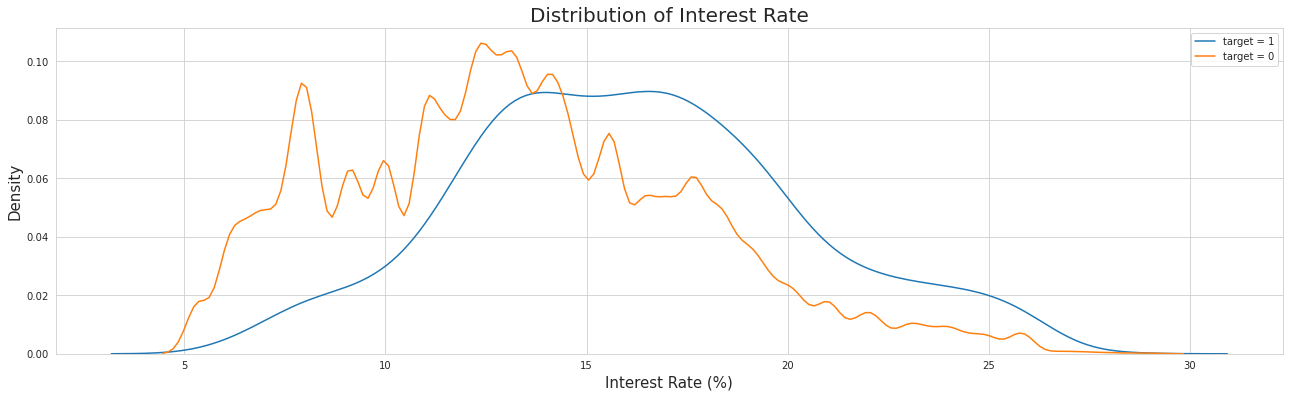

In [36]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['TARGET'] == 1, 'int_rate'], label = 'target = 1')
sns.kdeplot(df.loc[df['TARGET'] == 0, 'int_rate'], label = 'target = 0');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.legend()
plt.title('Distribution of Interest Rate',fontsize=20);


### Term


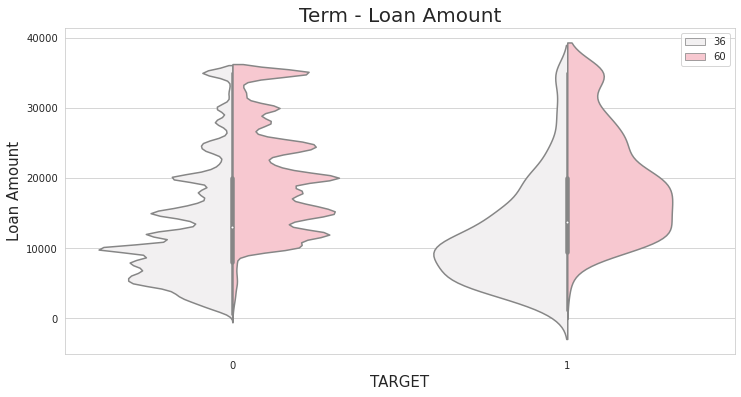

In [37]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="term", split=True,color='pink')
plt.title("Term - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.legend()
plt.ylabel("Loan Amount", fontsize=15);

### Application Type


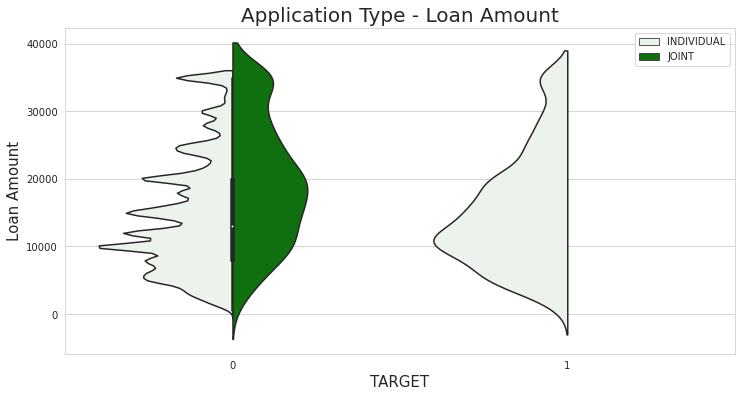

In [38]:


fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="application_type", split=True,color='green')
plt.title("Application Type - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.legend()
plt.ylabel("Loan Amount", fontsize=15);



In [39]:
print("Number of joint loans significant?")

df['application_type'].value_counts()

Number of joint loans significant?


INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64

### Loan Grade

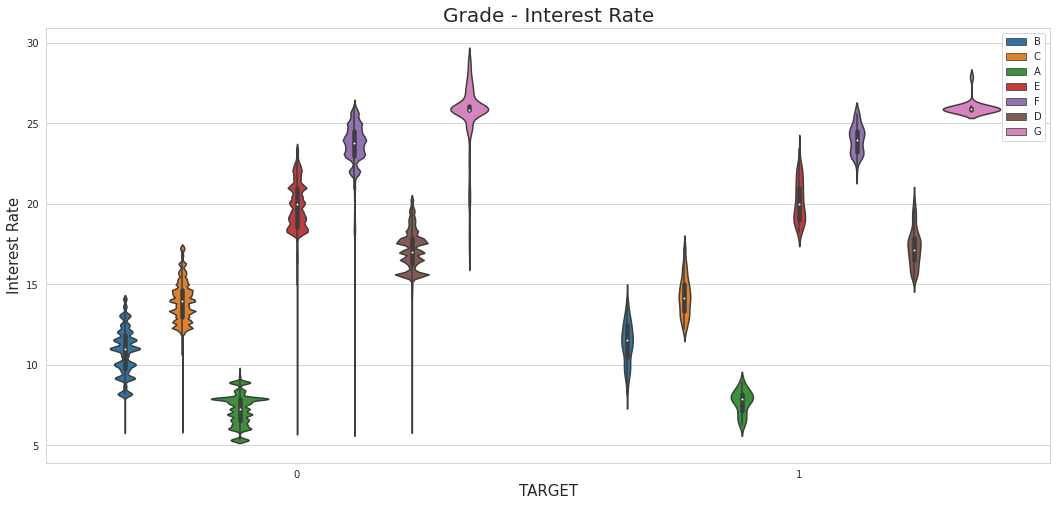

In [40]:
fig = plt.figure(figsize=(18,8))
sns.violinplot(x="TARGET",y="int_rate",data=df, hue="grade")
plt.title("Grade - Interest Rate", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.legend()
plt.ylabel("Interest Rate", fontsize=15);



### Correlation of Income to amount taken?

In [41]:
df.corr()['annual_inc'].sort_values().tail(10)

out_prncp_inv       0.211254
total_rev_hi_lim    0.268860
revol_bal           0.295784
installment         0.326182
funded_amnt_inv     0.331420
funded_amnt         0.332466
loan_amnt           0.332698
tot_cur_bal         0.418332
annual_inc          1.000000
policy_code              NaN
Name: annual_inc, dtype: float64

### State

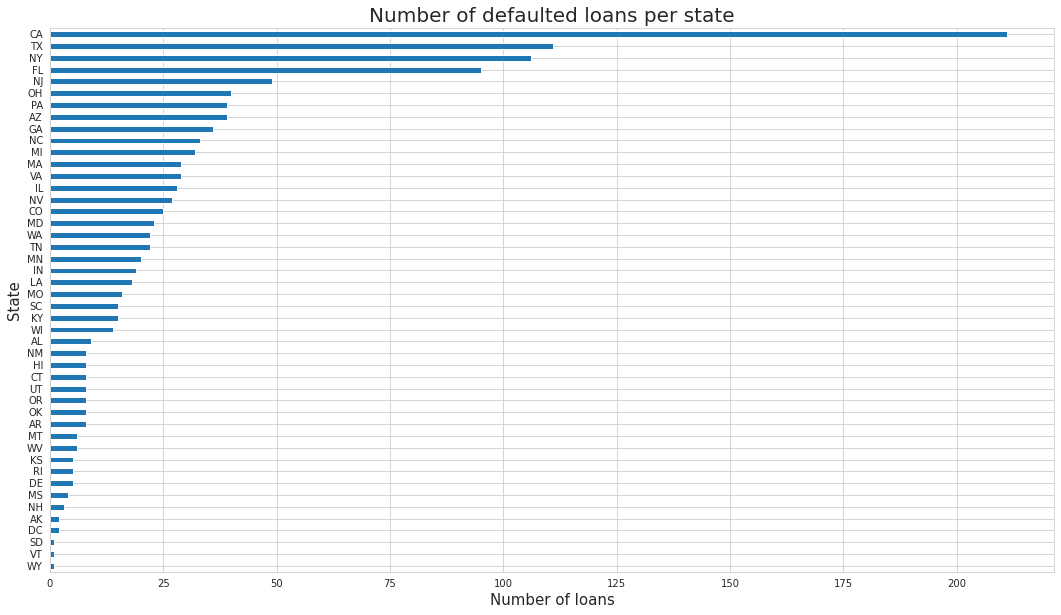

In [42]:
fig = plt.figure(figsize=(18,10))
df[df['TARGET']==1].groupby('addr_state')['TARGET'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

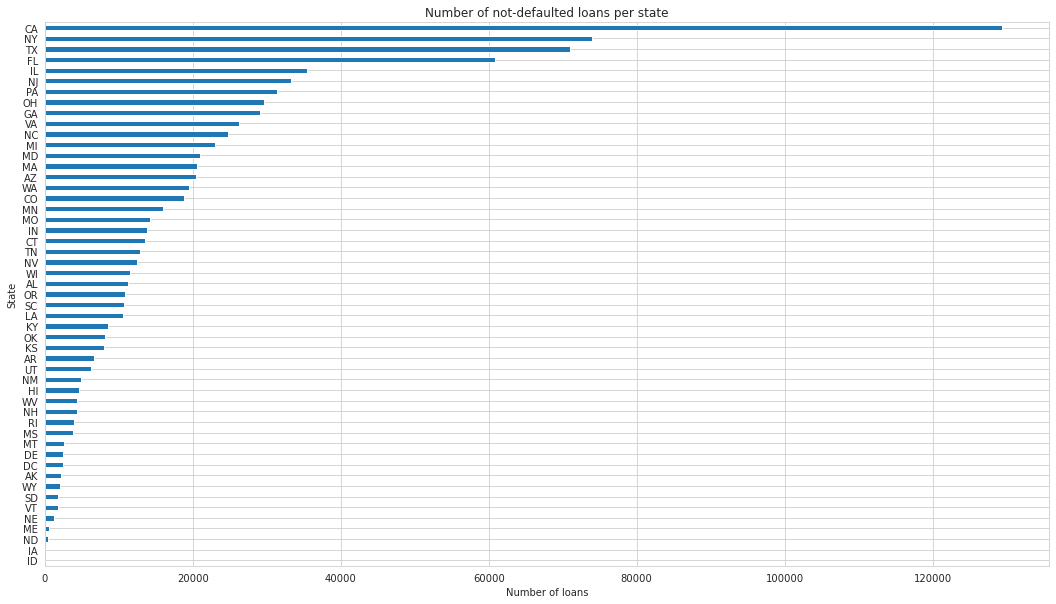

In [43]:
fig = plt.figure(figsize=(18,10))
df[df['TARGET']==0].groupby('addr_state')['TARGET'].count().sort_values().plot(kind='barh')
plt.ylabel('State')
plt.xlabel('Number of loans')
plt.title('Number of not-defaulted loans per state');



## Cleanup

In [44]:
df['emp_title'].value_counts().head()

Teacher             13469
Manager             11240
Registered Nurse     5525
Owner                5376
RN                   5355
Name: emp_title, dtype: int64

In [45]:
df.drop(['id_pk', 'member_id','emp_title','title','zip_code','url'],axis=1,inplace=True)

In [46]:
df.shape

(887379, 54)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   887379 non-null  float64
 1   funded_amnt                 887379 non-null  float64
 2   funded_amnt_inv             887379 non-null  float64
 3   term                        887379 non-null  int64  
 4   int_rate                    887379 non-null  float64
 5   installment                 887379 non-null  float64
 6   grade                       887379 non-null  object 
 7   sub_grade                   887379 non-null  object 
 8   emp_length                  887379 non-null  int64  
 9   home_ownership              887379 non-null  object 
 10  annual_inc                  887375 non-null  float64
 11  verification_status         887379 non-null  object 
 12  issue_month                 887379 non-null  object 
 13  issue_year    

## Preprocess

### Date Columns

In [25]:
# df['issue_d']= pd.to_datetime(df['issue_d']).apply(lambda x: int(x.strftime('%Y')))
# df['last_pymnt_d']= pd.to_datetime(df['last_pymnt_d'].fillna('2016-01-01')).apply(lambda x: int(x.strftime('%m')))
# df['last_credit_pull_d']= pd.to_datetime(df['last_credit_pull_d'].fillna("2016-01-01")).apply(lambda x: int(x.strftime('%m')))
# df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'].fillna('2001-08-01')).apply(lambda x: int(x.strftime('%m')))
# df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'].fillna(value = '2016-02-01')).apply(lambda x:int(x.strftime("%Y")))



### Categorical Features

In [48]:
from sklearn import preprocessing

In [49]:
count = 0

for col in df:
    if df[col].dtype == 'object' or col == 'term':
        if len(list(df[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)

term
pymnt_plan
initial_list_status
application_type
4 columns were label encoded.


In [28]:


df = pd.get_dummies(df)
print(df.shape)



(887379, 228)


In [29]:


df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median())


df.dropna(inplace=True)




In [30]:


df.count().sort_values().head(3)



loan_amnt        610438
addr_state_KS    610438
addr_state_KY    610438
dtype: int64

In [31]:
df['TARGET'].value_counts()

0    609247
1      1191
Name: TARGET, dtype: int64

## Modeling


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET',axis=1),df['TARGET'],test_size=0.15,random_state=101)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [38]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12)
x_train_r, y_train_r = sm.fit_resample(X_train, y_train)

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001,random_state=21)

#log_reg.fit(x_train_r, y_train_r)


In [40]:
print_score(log_reg, x_train_r, y_train_r, X_test, y_test, train=False)

Test Result:



NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.model_selection import cross_validate


sm = SMOTE(random_state=12)
x_train_r, y_train_r = sm.fit_resample(df.drop('TARGET',axis=1), df['TARGET'])

cross_validate(log_reg, x_train_r, y_train_r, cv=3, scoring=('accuracy', 'recall'))

### Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=40, random_state=21)
clf_rf.fit(x_train_r, y_train_r)

In [ ]:
print_score(clf_rf, x_train_r, y_train_r, X_test, y_test, train=False)